In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab import drive
from google.colab.patches import cv2_imshow

%matplotlib inline

In [2]:
drive.mount('/content/datasets/')

Mounted at /content/datasets/


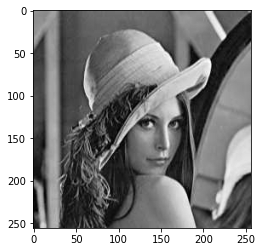

In [5]:
img = cv.imread('/content/datasets/MyDrive/a.png')
plt.imshow(img)

In [6]:
img.shape

(256, 256, 3)

In [7]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray_img.shape

(256, 256)

# 1. Spatial Domain Filters:

A digital image can be viewed as a two-dimensional function f (x, y), and the x-y plane indicates spatial position information, called the spatial domain. 

The filtering process is to move the filter point-by-point in the image function f (x, y) so that the center of the filter coincides with the point (x, y). At each point (x, y), the filter’s response is calculated based on the specific content of the filter and through a predefined relationship called template.

The spatial domain enhancement is based on pixels in a small range (neighbor). This means the transformed intensity is determined by the gray values of those points within the neighborhood.




**1.1 Smoothing:**

The process of reducing the influence of noise is called smoothing or blurring.

For a filter with a size of (2a+1, 2b+1), the output response can be calculated with the following function:

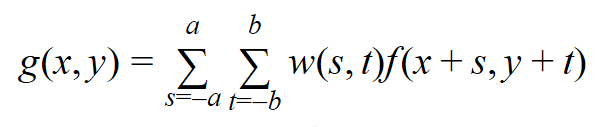

In [8]:
box_filter = np.ones(9)

f1 = box_filter.reshape(3, 3)

f1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [9]:
k , l = 0, 0

smooth_img = gray_img

#filter X image
for i in range(3):
  for j in range(3):
    smooth_img[k][l] = f1[i][j]*gray_img[k+i][l+j]
    l += 1
  k += 1

#Summation of filter's pixel
f1_sum = 0

for i in range(3):
  for j in range(3):
    f1_sum += f1[i][j]

print(f1_sum)

9.0


In [10]:
print(smooth_img.dtype)
smooth_img =smooth_img.astype('float64')
print(smooth_img.dtype)

smooth_img /= f1_sum

uint8
float64


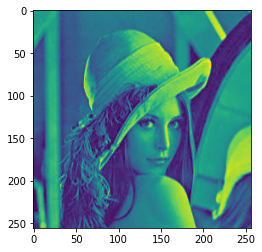

In [11]:
plt.imshow(smooth_img)

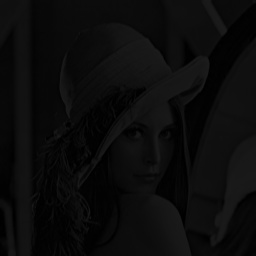

In [12]:
cv2_imshow(smooth_img)

**Explanation:**

Image smoothing is a digital image processing technique that reduces and suppresses image noises. In the spatial domain, neighborhood averaging can generally be used to achieve the purpose of smoothing. 

In smoothing we try to smooth noise and ignore edges. By applyng it intensity of smaller objects blends with the background and larger objects become like a blob and easy to detect.

The points in the 3 × 3 neighborhood centered on the point (x, y) are altogether involved in determining the (x, y) point pixel in the new image “g”. All coefficients being 1 means that they contribute the same (weight) in the process of calculating the g(x, y) value. 

The noises are replaced with the average of their surrounding points.

**1.2 Sharpening:** 

Image sharpening filters highlight edges by removing blur. It enhances the grayscale transition of an image, which is the opposite of image smoothing.

There are a couple of filters that can be used for sharpening. Here the most popular filters — Laplace operator, which is based on second order differential is used.

The discrete Laplacian of two variables is:


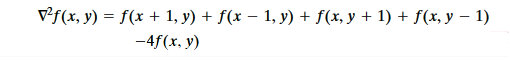

In [13]:
gray_img.shape

(256, 256)

In [14]:
sharp_img = gray_img

In [16]:
for i in range(1, 255):
  for j in range(1, 255):
    sharp_img[i][j] = gray_img[i+1][j]  + gray_img[i-1][j]  + gray_img[i][j+1]  + gray_img[i][j-1]  + 4*gray_img[i][j]

<ipython-input-16-bf3309057f60>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  sharp_img[i][j] = gray_img[i+1][j]  + gray_img[i-1][j]  + gray_img[i][j+1]  + gray_img[i][j-1]  + 4*gray_img[i][j]


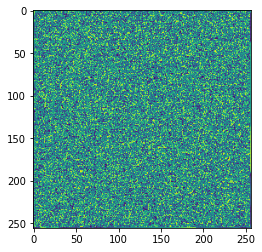

In [17]:
plt.imshow(sharp_img)

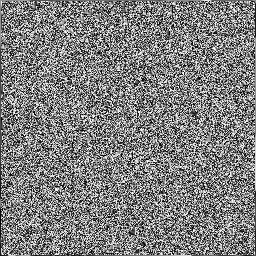

In [18]:
cv2_imshow(sharp_img)

**Explanation:**

How to distinguish noises and edges matters in sharpening. The difference is that, in smoothing we try to smooth noise and ignore edges and in sharpening we try to enhance edges and ignore noise.

Some applications of where sharpening filters are used are:

->Medical image visualization

->Photo enhancement

->Industrial defect detection

->Autonomous guidance in military systems
.

# 2. Frequency Domain Filters:

Frequency Domain Filters are used for smoothing and sharpening of image by removal of high or low frequency components. 

**2.1 Low Pass Filter:**

Low pass filter removes the high frequency components that means it keeps low frequency components. It is used for smoothing the image. It is used to smoothen the image by attenuating high frequency components and preserving low frequency components.

In [19]:
box_filter = np.zeros(25)

f2 = box_filter.reshape(5, 5)

f2[2][2] = 1

f2

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

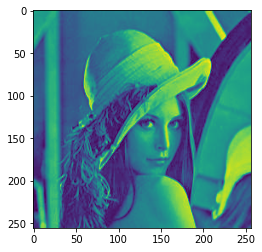

In [20]:
image = img[:, :, 0]
lowpass_img = ndimage.convolve(image, f2)

plt.imshow(lowpass_img)

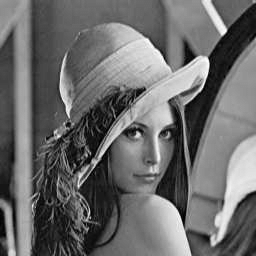

In [22]:
cv2_imshow(lowpass_img)

**Explanation:**

A low-pass filter passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.

The image becomes smooth decreasing the disparity between pixel values by averaging the nearby pixels.

The designed kernel maintains pixel balance attenuating the high frquency relative to it's neighboring pixels.

**2.2 High Pass Filter:**

High pass filter removes the low frequency components that means it keeps high frequency components. It is used for sharpening the image. It is used to sharpen the image by attenuating low frequency components and preserving high frequency components.

In [23]:
box_filter = np.ones(25)

f3 = box_filter.reshape(5, 5)

f3[2][2] = 0

f3

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

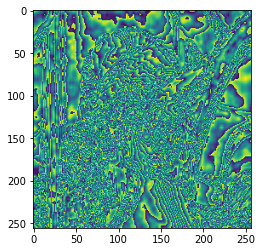

In [24]:
image = img[:, :, 0]
highpass_img = ndimage.convolve(image, f3)

plt.imshow(highpass_img)

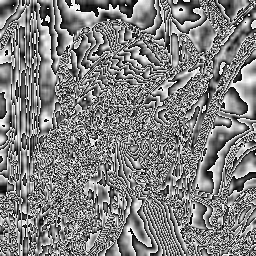

In [25]:
cv2_imshow(highpass_img)

**Explanation:**

A high-pass filter is an electronic filter that passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the cutoff frequency. 

The designed kernel increase the brightness of the center pixel relative to neighboring pixels.

The edges of the image becomes sharper by enhancing the contrast between adjoining areas with little variation in brightness and darkness.

In [26]:
cv.imwrite('smooth_img.jpg', smooth_img)
cv.imwrite('sharp_img.jpg', sharp_img)
cv.imwrite('lowpass_img.jpg', lowpass_img)
cv.imwrite('highpass_img.jpg', highpass_img)

True